### Nagenerujte 105 hodnot náhodné veličiny s rozdělením N(3, 9) .
 (μ=3 je stř.hod.  σ^2 = 9 je rozptyl) . σ=3 smerodatna odchylka

• Dle součtového vzorce pro N = 1-12

• Dle logaritmického vzorce

• Sestrojte grafy relativních četností

• Od jakého N je z časového hlediska efektivnější logaritmický vzorec ?

### Normální Rozdělení
Je charakterizováno dvěma parametry: střední hodnotou (μ) a rozptylem (σ^2). Hustota pravděpodobnosti normálního rozdělení je dána vzorcem:

Distribucni f-ce: f(x | μ,σ^2 ) = 1/ sqrt(2pi * σ^2) * exp^(- ((x-μ)^2 / 2σ^2))

Gaussovu náhodnou veličinu obvykle označujeme písmenem ζ nebo také
N(µ, σ). Speciálním případem je veličina N(0, 1),která bývá tabelována

Součet dvou nezávislých Gaussových náhodných veličin ζ1 a ζ2 je opět
Gaussovou náhodnou veličinou.

pro Gaussovu náhodnou veličinu ζ platí
P{µ − 3 σ < ζ < µ + 3 σ} = 0, 9973
a tato hodnota je velmi blízká jedné

### Centrální limitní věta počtu pravděpodobnosti

Budou-li ξ1, ξ2, . . . , ξn nezávislé náhodné veličiny se stejným rozdělením, které má střední hodnotu µ a rozptyl σ^2, pak jejich součet má pro velká n přibližně Gaussovo rozdělení s parametry N(n µ, n σ^2).

součet velkého počtu nezávislých a identicky rozdělených náhodných proměnných s konečným očekáváním a rozptylem se přibližuje normálnímu rozdělení, bez ohledu na původní rozdělení těchto proměnných. V našem případě jsme použili rovnoměrně rozdělené proměnné. Pokud tedy sečteme 12 takových proměnných a upravíme výsledek tak, aby měl požadovanou střední hodnotu a rozptyl, dostaneme aproximaci normálního rozdělení.

###
1) Střední hodnota (μ): Je průměrem hodnot "a" a "b", takže μ = (a+b)/2.

f(x) (hustota pravdepodobnosti, PDF) = 1/ (b-a)

2) Rozptyl (σ²): Je daný vztahem σ^2 = ∫(<a,b>)  (x-μ)^2 * f(x) dx = (b−a)^2 /12.

3) Pokud chceme, aby střední hodnota byla 0 a rozptyl 1 (což je vhodné pro použití v součtovém vzorci), potřebujeme najít hodnoty "a" a "b", které splňují tyto podmínky. Pro střední hodnotu 0 musí platit, že a=−b,
Abychom získali rozptyl 1, potřebujeme, aby ( b-(-b) )^2 / 12 = 1 => (2b)^2 /12 = 1 => b= sqrt(3) a = -(sqrt(3))

### 1)Generování rovnoměrně rozdělených náhodných čísel:

Ui ~ Uniform(-sqrt3, sqrt), i = 1...n hodnot, aby jednotlivé náhodné proměnné měly střední hodnotu 0 a rozptyl 1.

### 2) Výpočet součtu těchto náhodných čísel:

Sn = Σ Ui

### 3) Normalizace součtu pro získání požadovaného normálního rozdělení:

X = μ + σ/sqrt(N) * sn

Kde X je náhodná proměnná, která má být normálně rozdělená s požadovanou střední hodnotou μ a rozptylem σ^2. V našem případě je μ=3 a σ^2 = 9 takže σ=3.

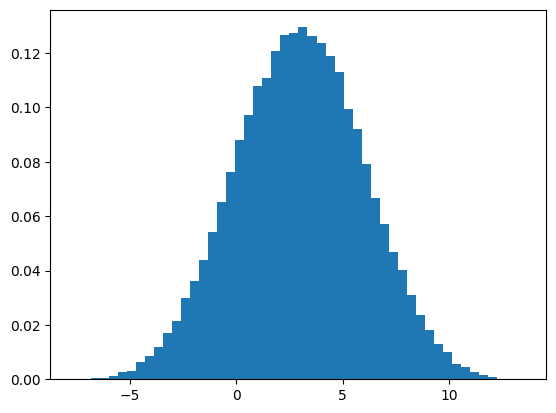

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import time

str_hod = 3
rozptyl = 9
smerodatna_odchylka = np.sqrt(rozptyl)

b = np.sqrt(3)
a = -b

souctove_vysledky = {}
cas_vypoctu = []

N = np.linspace(1,12,12, dtype= int) 
for ni in N:
    start = time.time()
    gen_rovn_rozl_hodnot = np.random.uniform(a,b, size= (10**5, ni) ) # velikost pole 10**5 radku N - sloupcu
    suma_hodnot = np.sum(gen_rovn_rozl_hodnot, axis=1) # soucet hodnot v radku

    normalizace_hodnnot = str_hod + smerodatna_odchylka * suma_hodnot / np.sqrt(ni)
    souctove_vysledky[ni] = normalizace_hodnnot
    cas_vypoctu.append(time.time() - start)
    
plt.hist(souctove_vysledky[5], bins=50, density= True)
plt.show();


### Relativni cetnost

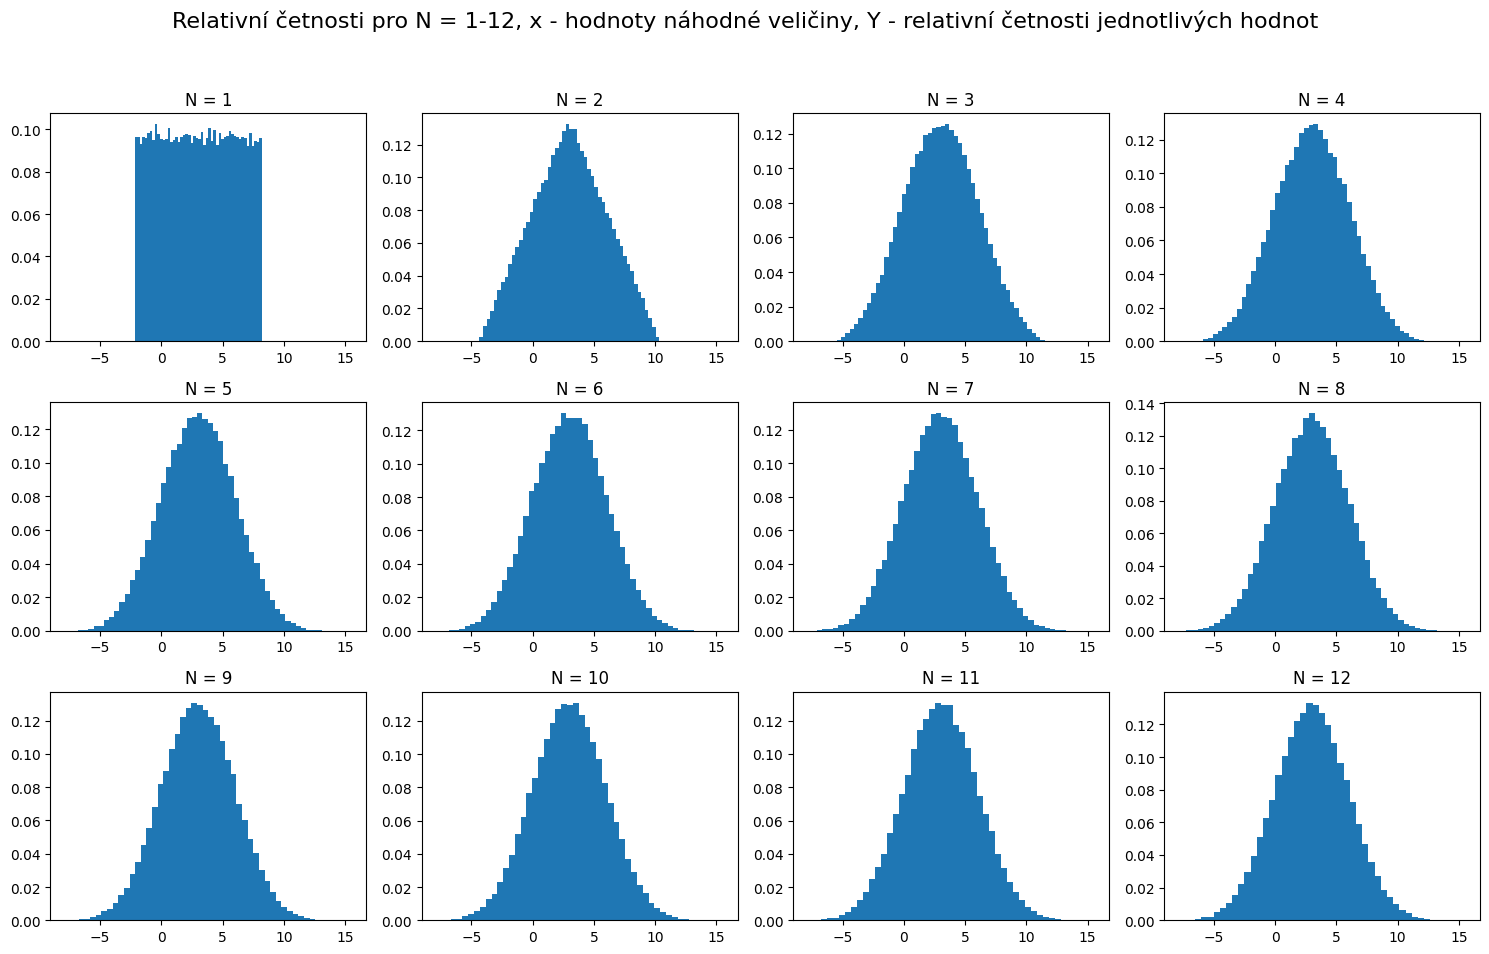

In [109]:
min_x = min([min(data) for data in souctove_vysledky.values()])
max_x = max([max(data) for data in souctove_vysledky.values()])

poc_radku = 3
poc_sloup = 4

fig, axes = plt.subplots(poc_radku, poc_sloup, figsize=(15, 10))
fig.suptitle('Relativní četnosti pro N = 1-12, x - hodnoty náhodné veličiny, Y - relativní četnosti jednotlivých hodnot', fontsize=16)
for ni in N:
    ni -= 1
    radek = ni // poc_sloup
    sloupec = ni % poc_sloup
    ax = axes[radek, sloupec]
    ni += 1
    ax.hist(souctove_vysledky[ni], bins=50, density=True)
    ax.set_title(f'N = {ni}')
    ax.set_xlim(min_x, max_x)

    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Cas vypoctu

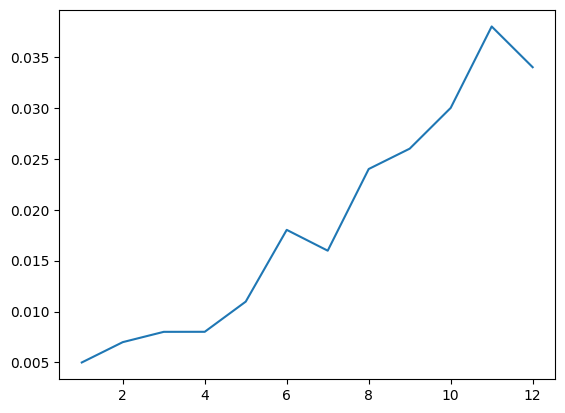

In [110]:
plt.plot(N, cas_vypoctu)

### Logaritmicky vzorec (Box-Mullerova Transformace)

Transformaci pro generování hodnot z normálního rozdělení. Je efektivnější pro větší množství dat, protože vyžaduje méně výpočetních kroků na hodnotu.

metoda pro generování nezávislých, standardně normálně rozdělených náhodných čísel z dvou nezávislých rovnoměrně rozdělených náhodných čísel v intervalu (0,1). Pokud U1 a U2 jsou nezávislé náhodné proměnné rovnoměrně rozdělené na (0,1), pak dvě náhodné proměnné

Z0 = sqrt(-2 ln U1) * cos(2pi U2)

Z1 = sqrt(-2 ln U1) * sin(2pi U2)

jsou nezávisle normálně rozdělené s průměrem 0 a rozptylem 1. Transformujeme je dále pro získání požadovaného normálního rozdělení N(μ,σ^2).

### 1)Generování dvou nezávislých rovnoměrně rozdělených náhodných čísel U1 a U2:

U1, U2 ~ Uniform (0,1)  základní náhodné proměnné, ze kterých budeme generovat normálně rozdělené hodnoty.

### 2) Použití Box-Mullerovy transformace k vytvoření dvou nezávislých standardně normálně rozdělených náhodných proměnných Z0 a Z1:

Z0 = sqrt(-2 ln U1) * cos(2pi U2)

Z1 = sqrt(-2 ln U1) * sin(2pi U2)

Tyto rovnice transformují rovnoměrně rozdělené proměnné na normálně rozdělené proměnné.

### 3) Transformace Z0 a Z1 na požadované normální rozdělení N(μ,σ^2):

X0 = μ+σ Z0

X1 = μ+σ Z1

Tímto způsobem transformujeme standardně normálně rozdělené proměnné na proměnné s požadovanou střední hodnotou μ a rozptylem σ^2.

Neni potreba generovat pro N = 1-12, logaritmicky vzorec primo generuje hodnoty s normalnim rozdelenim bez ohledu na pocet scitanych promenych

In [111]:
import random

str_hod = 3
rozptyl = 9
smerodatna_odchylka = np.sqrt(rozptyl)
pocet_kroku = 10**5
x0 = []
x1 = []
for i in range(pocet_kroku):
    u1 = random.random()
    u2 = random.random()

    z0 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
    z1 = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)

    xi0 = str_hod + smerodatna_odchylka * z0
    xi1 = str_hod + smerodatna_odchylka * z1
    
    x0.append(xi0)
    x1.append(xi1)

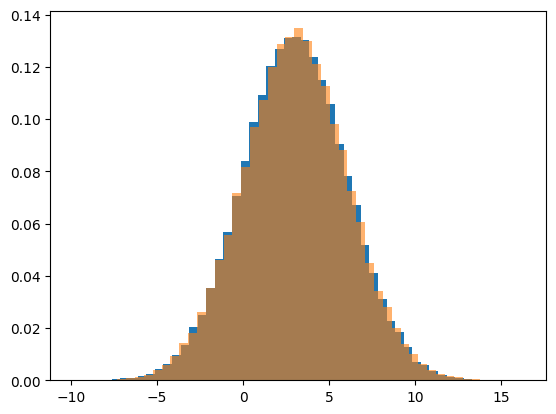

In [112]:
plt.hist(x0, bins=50, density=True, label='x0')
plt.hist(x1, bins=50, density=True, alpha=0.6, label='x1'  )
plt.show();

In [113]:
import time
str_hod = 3
rozptyl = 9
smerodatna_odchylka = np.sqrt(rozptyl)
x0 = []

# pro nasi ulohu staci vyuzit jenom 1 z sad hodnot
start = time.time()
u1 = np.random.random(size=10**5) # vektorizace je rychlejsi jak cykklus
z0 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
xi0 = str_hod + smerodatna_odchylka * z0
log_cas = time.time() - start

### Od jakého N je z časového hlediska efektivnější logaritmický vzorec ?

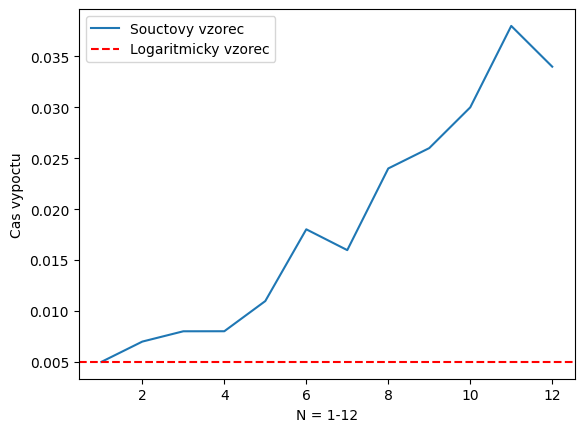

In [114]:
plt.xlabel('N = 1-12')
plt.ylabel('Cas vypoctu')
plt.plot(N, cas_vypoctu, label='Souctovy vzorec')
plt.axhline(y=log_cas, linestyle='--', color='red', label='Logaritmicky vzorec')
plt.legend()
plt.show();
